In [124]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
data=pd.read_csv("BankChurners.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [126]:
data.shape

(10127, 23)

In [127]:
data.drop("CLIENTNUM", axis=1, inplace=True)

In [128]:
data = data.iloc[:, :-2]
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [130]:
data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [131]:
income_mapping = {
    'Less than $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5,
    'Unknown': np.nan  # Treat "Unknown" as NaN
}
education_mapping = {
    'Uneducated': 1,
    'High School': 2,
    'College': 3,
    'Graduate': 4,
    'Post-Graduate': 5,
    'Doctorate': 6,
    'Unknown': np.nan  # Treat "Unknown" as NaN
}

In [132]:
# Encode ordinal columns

data['Income_Category'] = data['Income_Category'].map(income_mapping)
data['Education_Level'] = data['Education_Level'].map(education_mapping)

In [133]:
data.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status                 0
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [134]:
# Impute missing values with median
data['Income_Category'].fillna(data['Income_Category'].median(), inplace=True)
data['Education_Level'].fillna(data['Education_Level'].median(), inplace=True)

C:\Users\aksha\AppData\Local\Temp\ipykernel_35148\3562756247.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income_Category'].fillna(data['Income_Category'].median(), inplace=True)
C:\Users\aksha\AppData\Local\Temp\ipykernel_35148\3562756247.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [135]:
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})

In [136]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,2.0,Married,3.0,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,F,5,4.0,Single,1.0,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,M,3,4.0,Married,4.0,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,F,4,2.0,Unknown,1.0,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,M,3,1.0,Married,3.0,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [137]:
# Encode categorical columns with Label Encoding
label_encoder = LabelEncoder()
categorical_columns = [ 'Gender', 'Marital_Status', 'Card_Category']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])


In [138]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,2.0,1,3.0,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,4.0,2,1.0,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,4.0,1,4.0,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,2.0,3,1.0,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,1.0,1,3.0,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [139]:
# Step 2: Feature Scaling
# Separate features and target variable
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']  


In [140]:
# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [141]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [155]:
y_pred=lr.predict(X_test)
from sklearn.metrics import confusion_matrix , accuracy_score

cm=confusion_matrix(y_test , y_pred)
ac=accuracy_score(y_test , y_pred)
print(cm, "\n", ac)

[[ 180  145]
 [  58 1643]] 
 0.8998025666337611


0.8998025666337611

Accuracy: 0.9605133267522211

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       325
           1       0.97      0.98      0.98      1701

    accuracy                           0.96      2026
   macro avg       0.94      0.91      0.92      2026
weighted avg       0.96      0.96      0.96      2026


Confusion Matrix:
[[ 271   54]
 [  26 1675]]


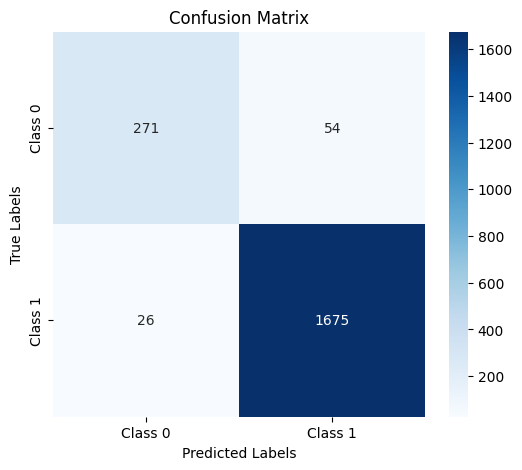

In [147]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=69, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred1 = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred1))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred1)
print("\nConfusion Matrix:")
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [148]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(19, input_shape=(19,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

c:\Program Files\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step - accuracy: 0.8182 - loss: 0.4801
Epoch 2/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 938us/step - accuracy: 0.8479 - loss: 0.3030
Epoch 3/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.8868 - loss: 0.2659
Epoch 4/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.9055 - loss: 0.2323
Epoch 5/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.9130 - loss: 0.2098
Epoch 6/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.9178 - loss: 0.1998
Epoch 7/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - accuracy: 0.9225 - loss: 0.1883
Epoch 8/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.9259 - loss: 0.1757
Epoch 9/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.9293 - loss: 0.1690
Epoch 10/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 614us/step - accuracy: 0.9306 - loss: 0.1690
Epoch 11/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.9358 - loss: 0.1616
Epoch 12/100
254/25

In [149]:
model.evaluate(X_test, y_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.9531 - loss: 0.1329


[0.14564383029937744, 0.9491609334945679]

In [150]:
yp = model.predict(X_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step


In [151]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.76      0.55      0.64       325\n           1       0.92      0.97      0.94      1701\n\n    accuracy                           0.90      2026\n   macro avg       0.84      0.76      0.79      2026\nweighted avg       0.89      0.90      0.89      2026\n'

In [152]:
accuracy_score(y_test , y_pred)

0.8998025666337611